In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wego = pd.read_csv(r"C:\Users\Tiffa\Documents\DA12\projects\wego-python-da12-python-spice-lattes\data\Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,8/1/2023,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.


In [5]:
wego.dropna(subset=['HDWY_DEV'], inplace=True)

In [6]:
driver_performance = wego.groupby('OPERATOR').agg({
    'HDWY_DEV': 'mean',
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
}).reset_index()

In [7]:

# driver_performance = wego.groupby('OPERATOR').agg({
#     'HDWY_DEV': mean() ,
#     'ADJUSTED_ONTIME_COUNT': 'sum',
#     'ADJUSTED_EARLY_COUNT': 'sum',
#     'ADJUSTED_LATE_COUNT': 'sum'
# }).reset_index()

In [8]:
driver_performance.head()

,OPERATOR,HDWY_DEV,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
0,56,-0.250000,2,0,0
1,235,1.918518,5,1,3
2,244,-0.037500,16,0,4
3,301,2.832222,17,1,12
4,304,1.839552,1788,3,235


In [9]:

driver_performance['Total_Count'] = (
    driver_performance['ADJUSTED_ONTIME_COUNT'] + 
    driver_performance['ADJUSTED_EARLY_COUNT'] + 
    driver_performance['ADJUSTED_LATE_COUNT']
)
driver_performance['On_Time_Performance'] = (driver_performance['ADJUSTED_ONTIME_COUNT'] / driver_performance['Total_Count']) * 100

In [10]:
driver_performance['Total_Count'].head()

0       2
1       9
2      20
3      30
4    2026
Name: Total_Count, dtype: int64

In [11]:
df = pd.DataFrame(driver_performance)

In [12]:
df.head()

,OPERATOR,HDWY_DEV,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,Total_Count,On_Time_Performance
0,56,-0.250000,2,0,0,2,100.000000
1,235,1.918518,5,1,3,9,55.555556
2,244,-0.037500,16,0,4,20,80.000000
3,301,2.832222,17,1,12,30,56.666667
4,304,1.839552,1788,3,235,2026,88.252715


In [13]:
df['OPERATOR'].nunique()

334

In [14]:
print(df)

     OPERATOR  HDWY_DEV  ADJUSTED_ONTIME_COUNT  ADJUSTED_EARLY_COUNT  \
0          56 -0.250000                      2                     0   
1         235  1.918518                      5                     1   
2         244 -0.037500                     16                     0   
3         301  2.832222                     17                     1   
4         304  1.839552                   1788                     3   
..        ...       ...                    ...                   ...   
329      3149  1.434226                     45                     4   
330      3156  0.759347                    174                     0   
331      3165  5.553472                      8                     0   
332      3166 -2.152299                     26                     0   
333      3173  1.342857                     14                     0   

     ADJUSTED_LATE_COUNT  Total_Count  On_Time_Performance  
0                      0            2           100.000000  
1            

In [15]:
driver_performance.columns = driver_performance.columns.str.strip()

In [16]:
print(driver_performance.columns)

Index(['OPERATOR', 'HDWY_DEV', 'ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'Total_Count', 'On_Time_Performance'],
      dtype='object')


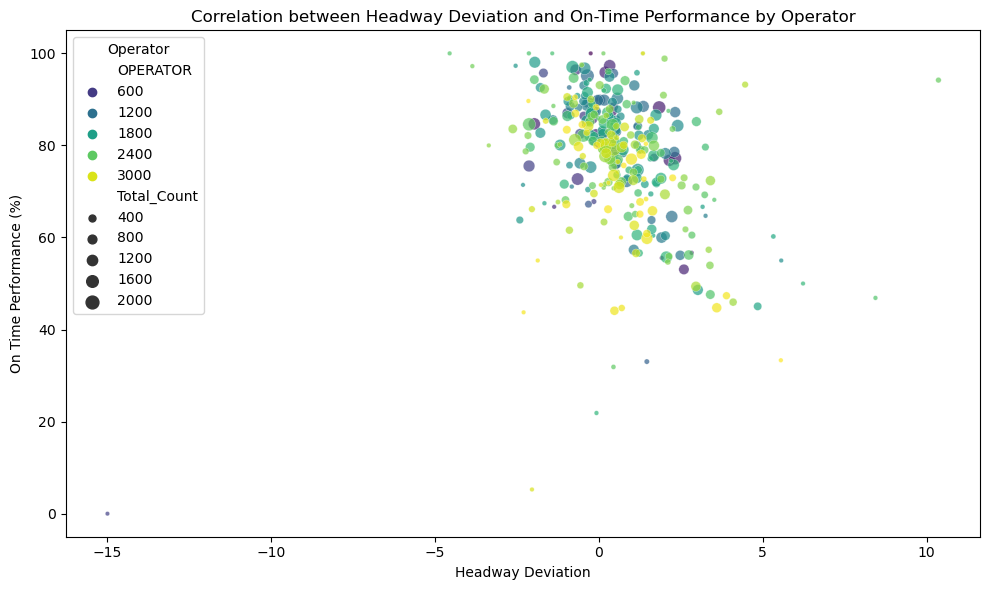

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data= driver_performance,
    x='HDWY_DEV',
    y='On_Time_Performance',
    hue='OPERATOR',
    palette='viridis',
    size='Total_Count',
    sizes=(10, 100),
    alpha=0.7
)
plt.title('Correlation between Headway Deviation and On-Time Performance by Operator')
plt.xlabel('Headway Deviation')
plt.ylabel('On Time Performance (%)')
plt.legend(title='Operator')
plt.tight_layout()
plt.show()